
<a id='chap-tparbresdecision'></a>

# Travaux pratiques - Arbres de décision

<img src="_images/jupyter_logo.png" style="">

[Cahier Jupyter](jupyter/tpArbresDecision.ipynb)

L’objectif de cette séance de travaux pratiques est d’exposer la mise en œuvre des arbres de décision pour les problèmes de classification et de régression. Ce document reprend librement certains exemples montrés dans l’excellente documentation de scikit-learn.

Références externes utiles :

> - [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)  
- [Documentation SciPy](https://docs.scipy.org/doc/scipy/reference/)  
- [Documentation MatPlotLib](http://matplotlib.org/)  
- [Site scikit-learn](http://scikit-learn.org/stable/index.html)  
- [Site langage python](https://www.python.org)  

## Arbres de décision

Les arbres de décision sont des méthodes d’apprentissage non paramétriques utilisées pour des problèmes de classification et de régression. L’objectif est de créer un modèle qui prédit les valeurs de la variable cible, en se basant sur un ensemble de séquences de règles de décision déduites à partir des données d’apprentissage.
L’arbre approxime donc la cible par une succession de règles `if-then-else`.
Ce paradigme s’applique aussi bien à des données catégorielles qu’à des données numériques.
Plus l’arbre généré est complexe, mieux le modèle « explique » les donnés d’apprentissage mais plus le risque de sur-apprentissage (*over-fitting*) est élevé.

Les arbres de décision ont plusieurs **avantages** qui les rendent intéressants dans des contextesoù il est utile de comprendre la séquence de décisions prise par le modèle :

- Ils sont simples à comprendre et à visualiser.  
- Ils nécessitent peu de préparation des données (normalisation, etc.).  
- Le coût d’utilisation des arbres est logarithmique.  
- Ils sont capables d’utiliser des données catégorielles et numériques.  
- Ils sont capables de traiter des problèmes multi-classe.  
- Modèle en boîte blanche : le résultat est facile à conceptualiser et à visualiser.  


Ces modèles présentent néanmoins deux **désavantages** majeurs :

- Sur-apprentissage :  parfois les arbres générés sont trop complexes et généralisent mal. Choisir des bonnes valeurs pour les paramètres profondeur maximale (`max_depth`) et nombre minimal d’exemples par feuille (`min_samples_leaf`) permet d’éviter ce problème.  
- Il peut arriver que les arbres générés ne soient pas équilibrés (ce qui implique que le temps de parcours n’est plus logarithmique). Il est donc recommandé d’ajuster la base de données avant la construction, pour éviter qu’une classe domine largement les autres (en termes de nombre d’exemples d’apprentissage).  

## Arbres pour la classification

Dans scikit-learn, la classe [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) permet de réaliser une classification multi-classe à l’aide d’un arbre de décision.

On commence par importer les bons modules et construire l’objet arbre :

In [39]:
from sklearn import tree
import matplotlib
clf = tree.DecisionTreeClassifier()

Pour l’exemple, nous pouvons définir un jeu de données minimaliste (deux points, chacun dans une classe) :

In [40]:
X = [[0, 0], [1, 1]]
y = [0, 1]

L’arbre se construit comme d’habitude à l’aide de la méthode `.fit(X, y)` :

In [41]:
clf = clf.fit(X, y)

La prédiction sur de nouveaux échantillons se fait de façon habituelle avec `.predict(X)` :

In [42]:
clf.predict([[2., 2.]])

array([1])

On peut aussi prédire la probabilité de chaque classe pour un échantillon (qui est calculée comme la fraction de données d’apprentissage dans chaque feuille) :

In [43]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

## Classification des données Iris

`DecisionTreeClassifier` est capable de gérer des problèmes de classification à plusieurs classes (par exemple, avec les étiquettes 0, 1, … K-1). Dans cet exemple nous allons travailler avec la base de données [Iris](https://archive.ics.uci.edu/ml/datasets/Iris), facilement accessible dans `sklearn`. Cette base contient 150 instances d’iris (un type de plante, chaque observation décrit sa morphologie). L’objectif est de classer chaque instance en une des trois catégories : *Iris setosa*, *Iris virginica* ou *Iris versicolor*.

Une des classes est linéairement séparable par rapport aux deux autres, mais les deux autres ne sont pas séparables une par rapport à l’autre.


<dl style='margin: 20px 0;'>
<dt>Les attributs du jeu de données sont :</dt>
<dd>
- longueur de sépale,  
- largeur de sépale,  
- longueur de pétale,  
- largeur de pétale,  
- classe : Iris Setosa, Iris Versicolor ou Iris Virginica.  


</dd>

</dl>

Un échantillon : (4.9,3.6,1.4,0.1, “Iris-setosa”)

Le jeu de données Iris étant très commun, scikit-learn propose une fonction native permettant de le charger en mémoire :

In [44]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

## Question

Calculer les statistiques (moyenne et écart-type) des quatre variables explicatives : longueur de sépale, largueur de sépale, longueur de pétale et largeur de pétale.

## Correction

In [45]:
import scipy

scipy.stats.describe(iris.data[:,:5])               # Return les couples min et max, la moyenne de chaque feature, la variance, skewness (asymétrie de la feature, répartition autour de la moyenne)
                                                    # skewness negative décalage sur la gauche; positive décalage sur la droite
                                                    # Et enfin retourne le Kurtosis, calcule la hauteur de la partie de la distribution qui est très éloignée de la moyenne (queue)
                                                    # Si le Kurtosis est supérieur à 0, alors l’ensemble de données est leptokurtique, c’est-à-dire que les queues sont plus épaisses que la normale. Cela indique un regroupement d’outliers.
                                                    # Si le Kurtosis est inférieur à 0, alors l’ensemble de données est platykurtique, c’est-à-dire que les queues sont plus fines que la normale. Cela indique un excès négatif d’outlier. En d’autres termes, la plupart des données ont tendance à se rassembler autour de la moyenne.


DescribeResult(nobs=np.int64(150), minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

## Question

Combien y a-t-il d’exemples de chaque classe ?

## Correction

In [46]:
import numpy as np
np.bincount(iris.target)                # compte les occurences de chaque valeur dans l'array

array([50, 50, 50])

Avant de construire le modèle, séparons le jeu de données en deux : 70% pour l’apprentissage, 30% pour le test.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

Nous pouvons désormais construire un arbre de décision sur ces données :

In [48]:
from sklearn import tree                                                   
clf = tree.DecisionTreeClassifier()                      #Construction de l'arbre de décision, on peut changer les paramètres ici ex criterion = 'gini' par défaut                                                                 
clf.fit(X_train, y_train)                                                # ou max depth pour réduire l'overfitting etc

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

Une fois l’apprentissage terminé, nous pouvons visualiser l’arbre, soit avec matplotlib en passant par la méthode `plot_tree`, soit avec l’outil `graphviz` (commande `dot`). Par exemple, avec matplotlib :

[Text(0.4, 0.9, 'x[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

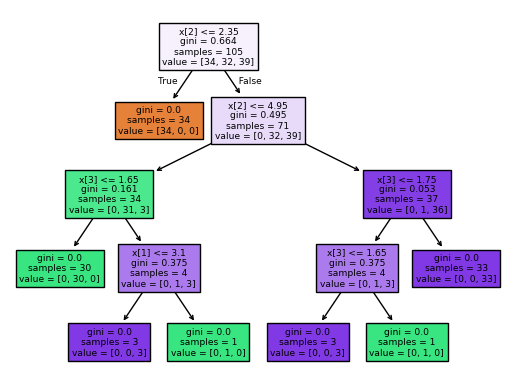

In [49]:
tree.plot_tree(clf, filled=True)                                    #Visualisation de l'arbre

Alternativement, il est possible de faire un export en produisant un fichier `.dot` qui est le format par défaut de graphviz :

In [50]:
# On exporte le graphe dans le fichier iris.dot
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, filled=True)

Ensuite, en ligne de commande, il est possible de convertir ce fichier dans de nombreux formats, par exemple en PDF (commande shell) :

In [51]:
%%bash
dot -Tpdf iris.dot -o iris.pdf

Couldn't find program: 'bash'


L’image générée doit ressembler à ceci :

> <img src="https://cedric.cnam.fr/vertigo/Cours/ml2/_images/iris.png" style="width:60%;">


Une fois le modèle construit, il est possible de l’utiliser pour la prédiction sur de nouvelles données :

In [52]:
clf.predict(X_test)                                             # Prédiction sur les données du set Test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

On peut de cette façon calculer le score en test :

In [53]:
clf.score(X_test, y_test)                                       # Score 97%

0.9777777777777777

## Question :

Changez les valeurs de parametres `max_depth` et `min_samples_leaf`. Que constatez-vous ?

En réduisant le max depth à 2 on obtient un moins bon score pour les prédictions spécifiques sur le set test.
à 3 les résultats sont les mêmes mais la généralisation à d'autres set sera peut être meilleure.
On obtient un moins bon score également en réduitsant min samples leaf à 20

## Correction :

Voir la documentation des [arbres de décision](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Le paramètre `max_depth` est un seuil sur la profondeur maximale de l’arbre. Le paramètre `min_samples_leaf` donne le nombre minimal d’échantillons dans un nœud feuille. Ils permettent de mettre des contraintes sur la construction de l’arbre et donc de contrôler indirectement le phénomène de sur-apprentissage.

Exemple d’utilisation :

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

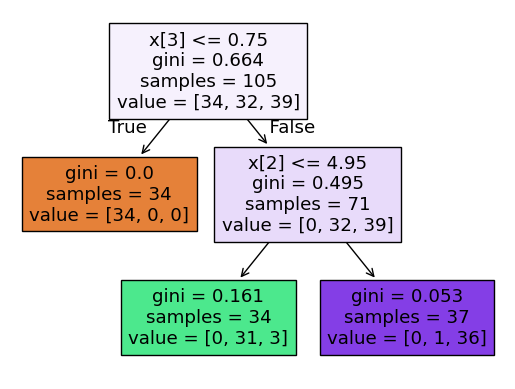

In [54]:
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train, y_train)   
tree.plot_tree(clf, filled=True)      


In [55]:
clf.predict(X_test)   
   

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [56]:
clf.score(X_test, y_test) 

0.9111111111111111

ou bien :

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

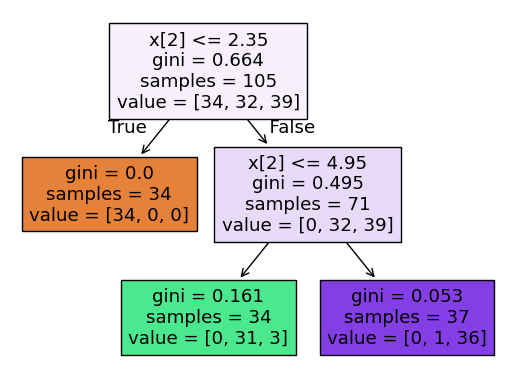

In [57]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 20)
clf.fit(X_train, y_train)   
tree.plot_tree(clf, filled=True)      

In [58]:
clf.predict(X_test)   

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [59]:
clf.score(X_test, y_test) 

0.9111111111111111

Voici l’arbre obtenu avec `min_samples_leaf=20`. Il a plus d’éléments dans les feuilles, donc moins de nœuds et l’arbre est moins profond.

<img src="https://cedric.cnam.fr/vertigo/Cours/ml2/_images/tparbresiris1.svg" style="width:100%;">

## Question :

Le problème ici étant particulièrement simple, refaites une division apprentissage/test avec 5% des données en apprentissage et 95% test.

Calculez le taux d’éléments mal classifiés sur l’ensemble de test.

Faites varier (ou mieux, réalisez une recherche par grille avec `GridSearchCV`) les valeurs des paramètres `max_depth` et `min_samples_leaf` pour mesurer leur impact sur ce score.

## Correction :

En général on utilise une division apprentissage/test de type 80/20 ou 70/30 mais comme ici le problème d’apprentissage est particulièrement simple nous prenons seulement 5% de la base comme échantillon d’apprentissage (sinon, on risque de ne rien voir quand on modifie les paramètres).

In [60]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
            test_size=0.95, random_state=0)

for mdepth in [1, 2, 3, 4, 5, 6, 7]:                                                # différentes valeurs de max depth et les scores
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf = clf.fit(X_train, y_train)
    print(f"maxdepth = {mdepth} , score = {clf.score(X_test, y_test)}")

print("")

for msplit in [2, 3, 5, 10, 15, 20]:                                               # différentes valeurs de min_samples et les scores
    clf = tree.DecisionTreeClassifier(min_samples_split=msplit)
    clf = clf.fit(X_train, y_train)
    print(f"minsamples = {msplit}, score = {clf.score(X_test, y_test)}")

                                                                                # avec si peu de valeurs d'apprentissage les scores sont volatils et changent d'une itération à lautre

maxdepth = 1 , score = 0.6573426573426573
maxdepth = 2 , score = 0.8881118881118881
maxdepth = 3 , score = 0.7062937062937062
maxdepth = 4 , score = 0.6643356643356644
maxdepth = 5 , score = 0.7062937062937062
maxdepth = 6 , score = 0.8111888111888111
maxdepth = 7 , score = 0.7972027972027972

minsamples = 2, score = 0.7062937062937062
minsamples = 3, score = 0.7552447552447552
minsamples = 5, score = 0.6573426573426573
minsamples = 10, score = 0.32167832167832167
minsamples = 15, score = 0.32167832167832167
minsamples = 20, score = 0.32167832167832167


Pour chercher de bonnes valeurs pour les paramètres on peut utiliser la validation croisée avec `GridSearchCV` :

In [72]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
    test_size=0.30, random_state=0)
from sklearn.model_selection import GridSearchCV
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}
grid_search = GridSearchCV(clf, param_grid=pgrid, cv=10)                #GridSearch pour trouver la meilleure combinaison d'hyperparamètres
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

0.9550945378151261

### Affichage de la surface de décision

Pour une paire d’attributs, c’est-à-dire pour des observations en deux dimensions, nous pouvons visualiser la surface de décision en 2 dimensions. D’abord on discrétise le domaine bidimensionnel avec un pas constant et ensuite on évalue le modèle sur chaque point de la grille.

Dans cet exemple, nous ne gardons que la longueur et la largeur des pétales.

C:\Users\alexandre.karneff\AppData\Local\Temp\ipykernel_19160\1133000338.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


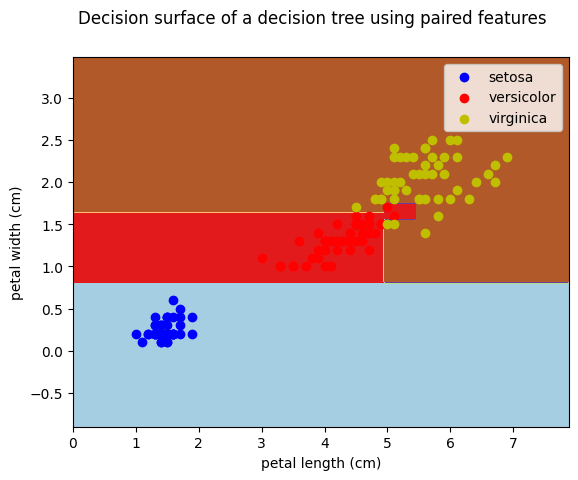

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]

# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

### Question :

Refaire l’affichage pour les autres paires d’attributs. Sur quelle paire la séparation entre les classes est la plus marquée ?

C:\Users\alexandre.karneff\AppData\Local\Temp\ipykernel_19160\1052152911.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


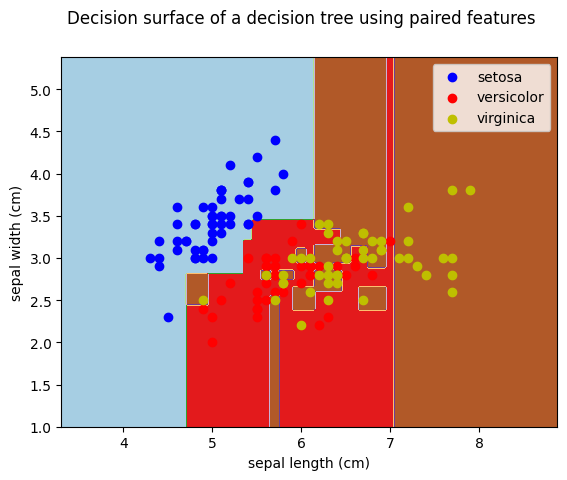

In [63]:
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [0, 1]

# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

C:\Users\alexandre.karneff\AppData\Local\Temp\ipykernel_19160\483164051.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


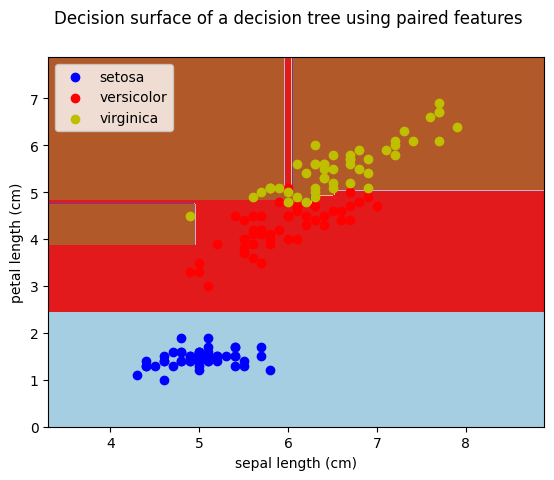

In [64]:
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [0, 2]

# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

C:\Users\alexandre.karneff\AppData\Local\Temp\ipykernel_19160\298775499.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


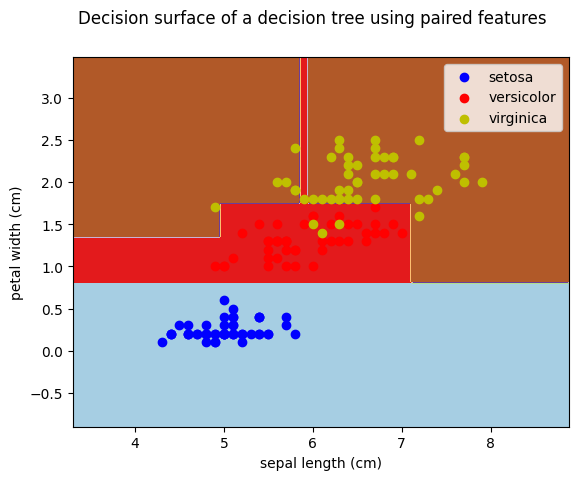

In [65]:
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [0, 3]

# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

C:\Users\alexandre.karneff\AppData\Local\Temp\ipykernel_19160\673116906.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


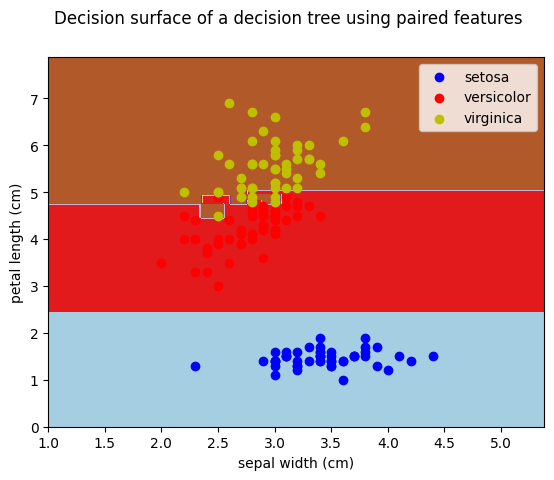

In [66]:
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [1, 2]

# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

C:\Users\alexandre.karneff\AppData\Local\Temp\ipykernel_19160\3251234124.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


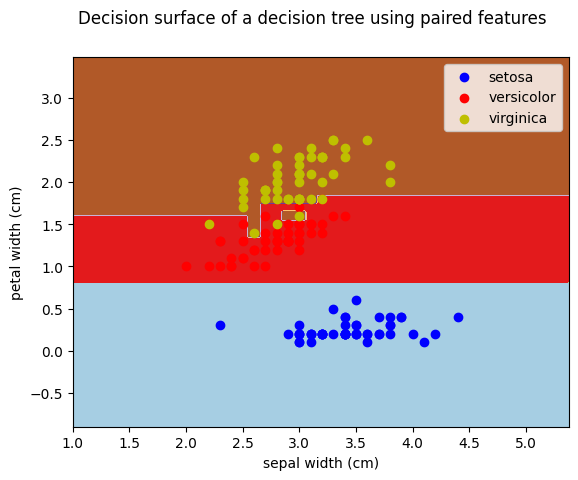

In [67]:
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [1, 3]

# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

le dernier semble être la paire ou la séparation est la plus marquée: sepal width et petal width

### Correction :

<img src="https://cedric.cnam.fr/vertigo/Cours/ml2/_images/tparbresfig01.svg" style="width:30%;">

<img src="https://cedric.cnam.fr/vertigo/Cours/ml2/_images/tparbresfig02.svg" style="width:30%;">

<img src="https://cedric.cnam.fr/vertigo/Cours/ml2/_images/tparbresfig03.svg" style="width:30%;">

<img src="https://cedric.cnam.fr/vertigo/Cours/ml2/_images/tparbresfig12.svg" style="width:30%;">

<img src="https://cedric.cnam.fr/vertigo/Cours/ml2/_images/tparbresfig13.svg" style="width:30%;">

<img src="https://cedric.cnam.fr/vertigo/Cours/ml2/_images/tparbresfig23.svg" style="width:30%;">

## Arbres de décision pour la régression

Pour la régression avec les arbres de décision, scikit-learn offre la classe `DecisionTreeRegressor`. Comme pour la classification, la méthode `fit(...)` prend en entrée le paramètre X (attributs des observations). Attention : les `y` ne sont pas des étiquettes de classes mais des valeurs réelles.

In [68]:
from sklearn import tree

X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

Dans l’exemple suivant nous allons construire un signal sinusoïdal affecté par un bruit blanc et nous allons apprendre un arbre de régression sur ces données d’apprentissage.

Text(0.5, 1.0, 'Signal sinusoïdal bruité')

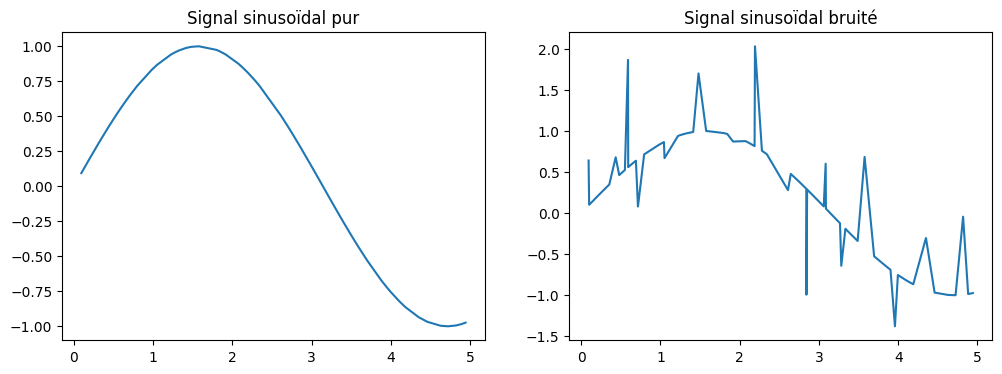

In [69]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

# Créer les données d'apprentissage
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
plt.plot(X, y)
plt.title("Signal sinusoïdal pur")

# On ajoute un bruit aléatoire tous les 5 échantillons
y[::5] += 3 * (0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X, y)
plt.title("Signal sinusoïdal bruité")

L’objectif est de régresser ce signal `y` à partir des valeurs de `x`. Pour cela, nous utilisons un arbre de régression.

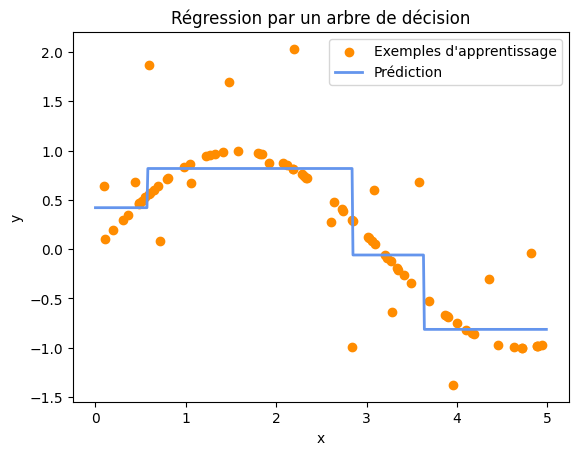

In [70]:
# Apprendre le modèle
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)

# Prédiction sur la même plage de valeurs
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)

# Affichage des résultats
plt.figure()
plt.scatter(X, y, c="darkorange", label="Exemples d'apprentissage")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prédiction", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()

## Question :

Changer la valeur du parametre `max_depth`. Que se passe-t-il si on prend une valeur trop grande ? Trop petite ? Changer le taux d’éléménts affectés par le bruit (le `y[::5]`). Quand tous les éléments sont affectés par le bruit, faut-il préférer une valeur élevée ou faible pour `max_depth` ?

## Correction :

Si `max_depth` a une valeur trop grande, le modèle suit le bruit, nous sommes donc en situation de sur-apprentissage. Si `max_depth` a une valeur trop petite, le modèle résultant ne suit pas bien les données : nous sommes dans une situation de sous-apprentissage. Dans les deux cas le pouvoir de généralisation est affecté. Il faut donc préférer une valeur intermédiaire, qui permet de faire un compromis en fonction du coüt des erreurs (cela dépend de l’application).

## Question :

Pour approfondir, chargez la base de données Diabetes du module `sklearn.datasets` et faire une  partition aléatoire en partie apprentissage et partie test (70% apprentissage, 30% test). Construire un modèle d’arbre de regression sur cette base. Calculer l’erreur quadratique moyenne sur l’ensemble de test. Faire un *grid search* pour trouver la valeur du paramètre `max_depth` qui minimize cette erreur.

## Correction :

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes.data, diabetes.target, test_size=0.30, random_state=0)

clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
mean_squared_error(y_test, y_predicted)
# --> 4365.3425018803518

pgrid = {"max_depth": [2, 3, 4, 5, 6, 7]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=pgrid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)
y_predicted = grid_search.best_estimator_.predict(X_test)
mean_squared_error(y_test, y_predicted)
# --> 4029.0729322641987
grid_search.best_params_
# -->{'max_depth': 2}

{'max_depth': 2}